In [ ]:
#MOVIE RATING PREDICTION MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("./Train/Train.csv")

In [3]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [4]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()

In [5]:
y=dataset["label"].values
y=ln.fit_transform(y)   #for pos(1) and for neg(0)

In [6]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
##PREPROCESSING OF DATASET

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [9]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    sample=sample.split()
    sample=[ps.stem(s) for s in sample if s not in sw]
    sample=" ".join(sample)
    return sample

In [10]:
clean_text(dataset["review"][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [11]:
dataset["cleaned_review"]=dataset["review"].apply(clean_text)

In [12]:
dataset.head()

,review,label,cleaned_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...


In [13]:
corpus = dataset['cleaned_review'].values

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [15]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [16]:
X = cv.fit_transform(corpus)

In [17]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [18]:
tfidf = TfidfTransformer()

In [19]:
X = tfidf.fit_transform(X)

In [20]:
print(X[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [23]:
##NEURAL NETWORK

In [22]:
from keras import models
from keras.layers import Dense

In [23]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [26]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [27]:
X_train.shape, y_train.shape

((35000, 50000), (35000,))

In [28]:
hist = model.fit(X, y, batch_size=128, epochs=2, validation_data=(X_val, y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
40000/40000 [==============================] - 53s 1ms/step - loss: 0.4270 - accuracy: 0.8466 - val_loss: 0.2201 - val_accuracy: 0.9184
Epoch 2/2
40000/40000 [==============================] - 51s 1ms/step - loss: 0.2085 - accuracy: 0.9193 - val_loss: 0.1605 - val_accuracy: 0.9374


In [29]:
result = hist.history

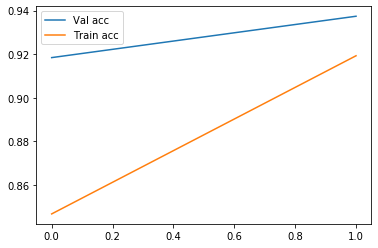

In [32]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

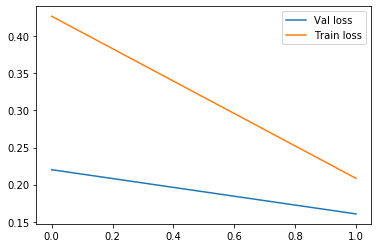

In [33]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [34]:
model.evaluate(X_val, y_val)

5000/5000 [==============================] - 5s 1ms/step


[0.16048747103214264, 0.9373999834060669]